In [2]:
from functions import *
plt.rcParams['figure.figsize']=(13, 7)

## Linear Testing

In [3]:
df = pd.read_csv(r'ProyectoFinalMensual.csv')
df.head()

,Date,Inflation_Index,Brent_Price,Gold_USD,MSCI_World,SPX_value,Interest_Rate
0,1990-10,7.72,36.02,379.50,58415.02,304.00,7.46
1,1990-11,7.83,33.07,384.85,56330.60,322.22,7.31
2,1990-12,7.65,28.27,386.20,58201.46,330.22,6.82
3,1991-1,7.44,23.57,366.00,60491.37,343.93,6.59
4,1991-2,7.22,19.54,362.70,65002.78,367.07,6.30


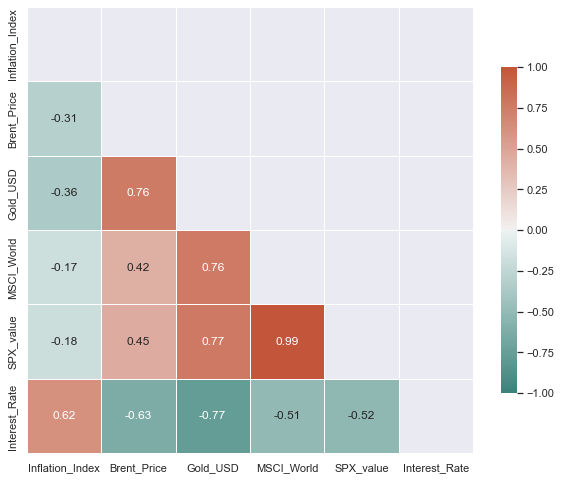

In [4]:
print_corr(df)

Observamos que hay correlación entre el tipos de interés y la tasa de inflación, con cierta influencia del precio del oro, por tanto, probamos con estas variables para comprobarlo:

In [5]:
import statsmodels.formula.api as smf

model1 = smf.ols('Inflation_Index ~ Interest_Rate', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Inflation_Index   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     243.9
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           7.63e-43
Time:                        16:50:14   Log-Likelihood:                -687.34
No. Observations:                 383   AIC:                             1379.
Df Residuals:                     381   BIC:                             1387.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.9060      0.118     16.184

In [6]:
features = ['Inflation_Index', 'Brent_Price', 'Gold_USD', 'SPX_value', 'MSCI_World'
    
]

In [7]:
orders_standardized = df.copy()
for f in features:
    mu = df[f].mean()
    sigma = df[f].std()
    orders_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
orders_standardized.head()

,Date,Inflation_Index,Brent_Price,Gold_USD,MSCI_World,SPX_value,Interest_Rate
0,1990-10,2.351753,-0.468904,-0.852857,-1.154115,-1.243042,7.46
1,1990-11,2.410668,-0.558499,-0.842905,-1.163868,-1.224233,7.31
2,1990-12,2.314261,-0.704281,-0.840394,-1.155114,-1.215975,6.82
3,1991-1,2.201785,-0.847025,-0.877967,-1.144399,-1.201823,6.59
4,1991-2,2.083953,-0.969421,-0.884105,-1.123289,-1.177936,6.30


In [8]:
import statsmodels.formula.api as smf

formula = 'Interest_Rate ~' + '+'.join(features)

model4 = smf.ols(formula=formula, data=orders_standardized).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     212.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          3.41e-107
Time:                        16:50:16   Log-Likelihood:                -591.66
No. Observations:                 383   AIC:                             1195.
Df Residuals:                     377   BIC:                             1219.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.7056      0.058     

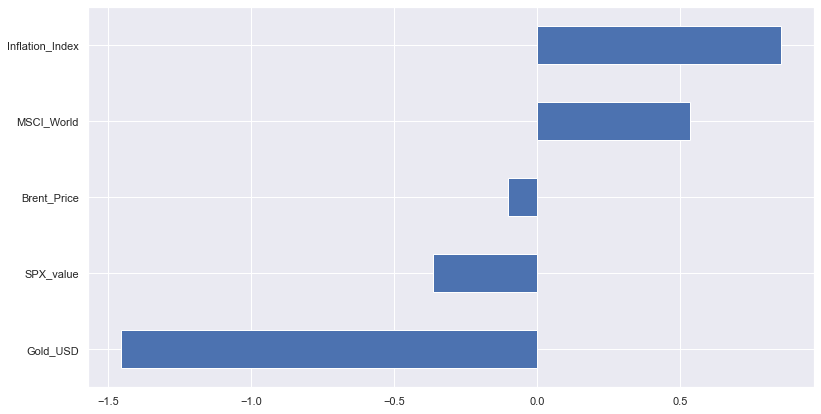

In [9]:
model4.params[1:].sort_values().plot(kind='barh');

Aquí observamos claramente lo anteriormente expuesto

In [10]:
from statsmodels.stats.outliers_influence import OLSInfluence
predicted_review_score = model4.predict(orders_standardized[features])

In [11]:
residuals = OLSInfluence(model4).get_resid_studentized_external()

In [12]:
rmse = (residuals**2).mean()**0.5
rmse

1.0002210893351309

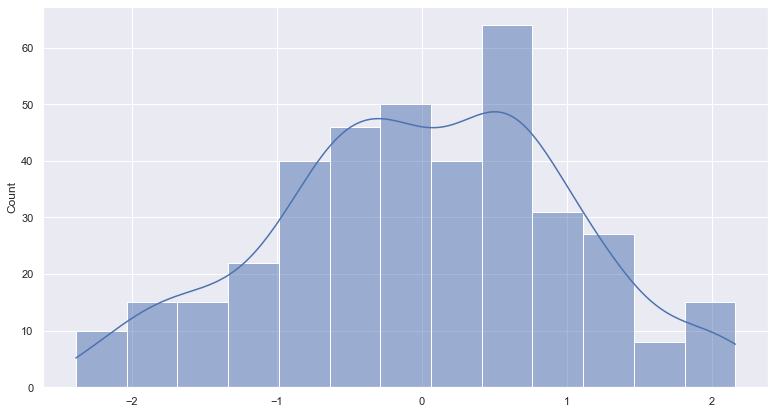

In [13]:
sns.histplot(residuals, kde=True);

In [14]:
features2 = ['Inflation_Index','Gold_USD',
    
]

In [15]:
orders_standardized = df.copy()
for f in features2:
    mu = df[f].mean()
    sigma = df[f].std()
    orders_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
orders_standardized

,Date,Inflation_Index,Brent_Price,Gold_USD,MSCI_World,SPX_value,Interest_Rate
0,1990-10,2.351753,36.02,-0.852857,58415.02,304.00,7.46
1,1990-11,2.410668,33.07,-0.842905,56330.60,322.22,7.31
2,1990-12,2.314261,28.27,-0.840394,58201.46,330.22,6.82
3,1991-1,2.201785,23.57,-0.877967,60491.37,343.93,6.59
4,1991-2,2.083953,19.54,-0.884105,65002.78,367.07,6.30
...,...,...,...,...,...,...,...
378,2022-4,3.139082,104.58,1.996350,930885.51,4545.86,0.33
379,2022-5,3.390814,113.34,1.861311,917250.24,4155.38,0.83
380,2022-6,3.717529,122.71,1.820948,864429.84,4101.23,1.58
381,2022-7,3.701461,111.93,1.702650,950606.68,3825.33,2.33


In [16]:
import statsmodels.formula.api as smf

formula = 'Interest_Rate ~' + '+'.join(features)

model4 = smf.ols(formula=formula, data=orders_standardized).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     212.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          3.41e-107
Time:                        16:50:24   Log-Likelihood:                -591.66
No. Observations:                 383   AIC:                             1195.
Df Residuals:                     377   BIC:                             1219.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.6703      0.250     

#### Conclusión